In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

from detection.road import Road
from detection.config import DetectionConfig

config = DetectionConfig(classifier_name="LinearSVC")
road = Road(config=config, threshold=5)

Unpickling file classifier_LinearSVC_full_125_1.0_RGB_YCrCb_32_8_16_2_True.p.
Unpickling file scaler_full_125_1.0_RGB_YCrCb_32_8_16_2_True.p.


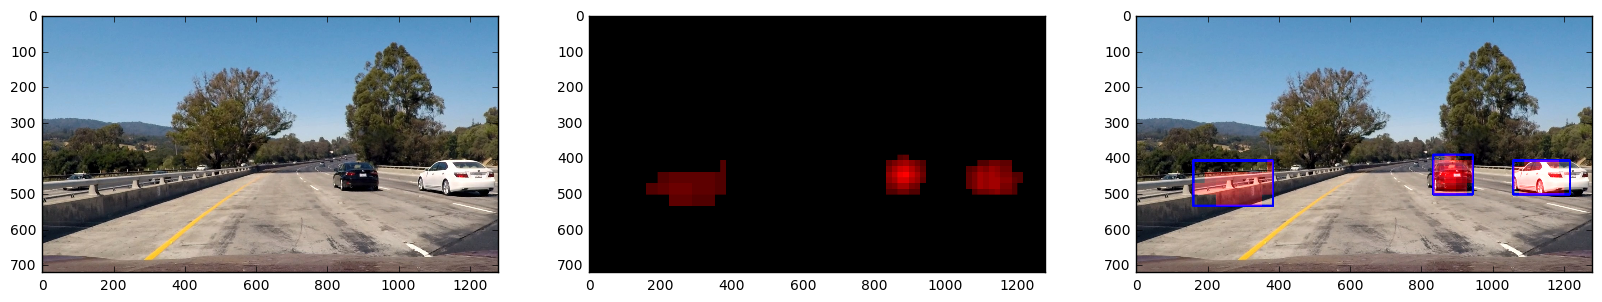

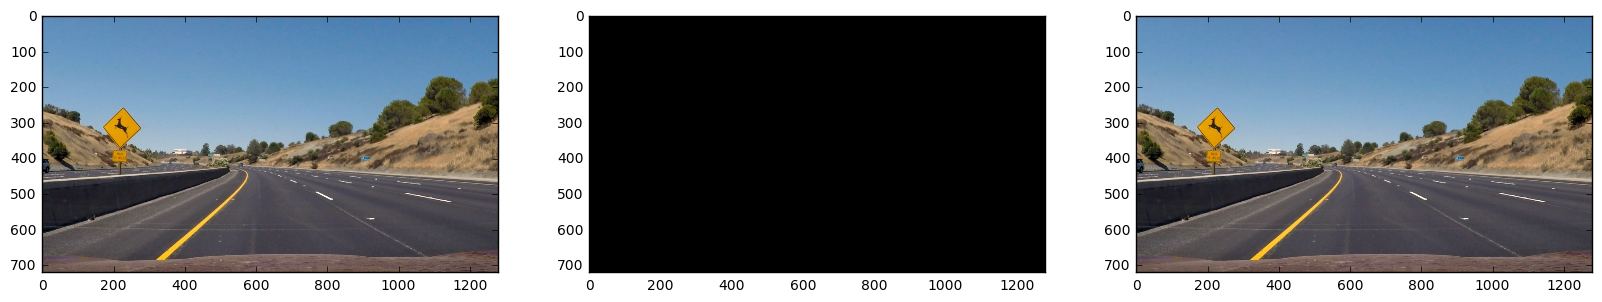

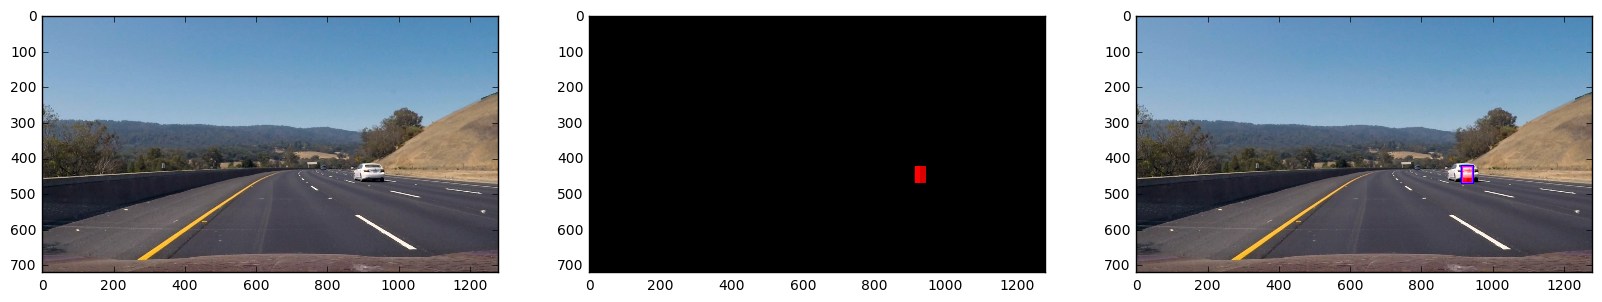

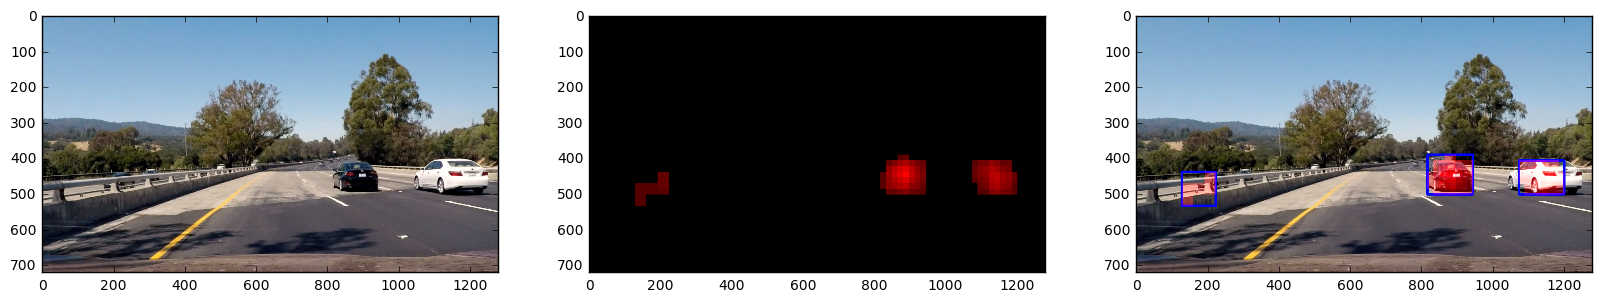

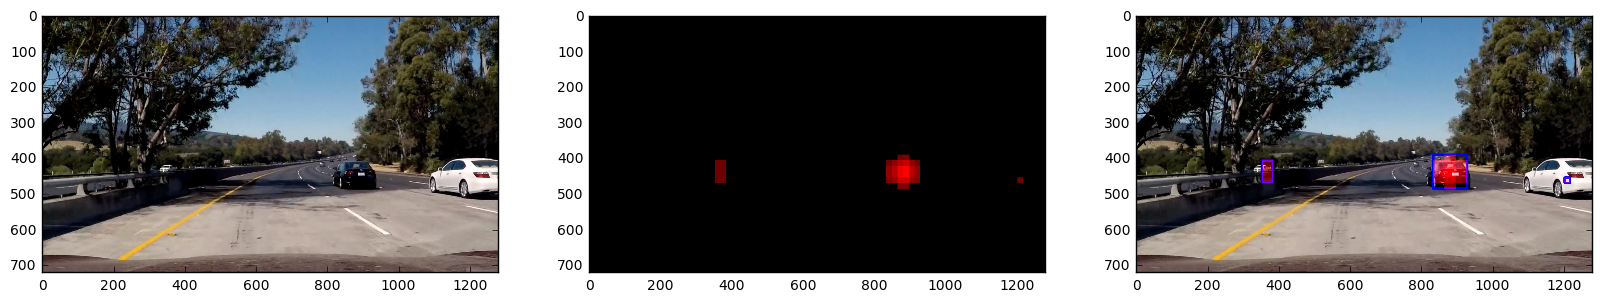

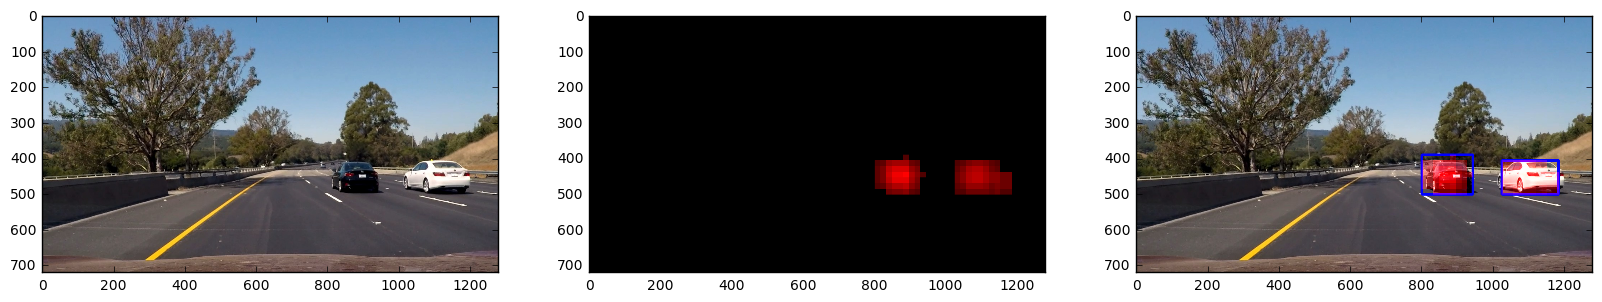

In [2]:
for i in range(1,7):
    img = mpimg.imread("input_images/test"+ str(i) +".jpg")
    road.recent_bboxes = []
    processed_image = road.process_image(img)

    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
    norm = plt.Normalize(vmin=road.threshold_heatmap.min(), vmax=road.threshold_heatmap.max())
    norm_heatmap = norm(road.threshold_heatmap)
    heatmap_image = (np.dstack((norm_heatmap*255, norm_heatmap, norm_heatmap))).astype(np.uint8)
    ax1.imshow(img)
    ax2.imshow(heatmap_image)
    processed_image = cv2.addWeighted(heatmap_image, 1, processed_image, 1, 0)
    ax3.imshow(processed_image)
    
plt.show()

Took 0.9 seconds to find images.


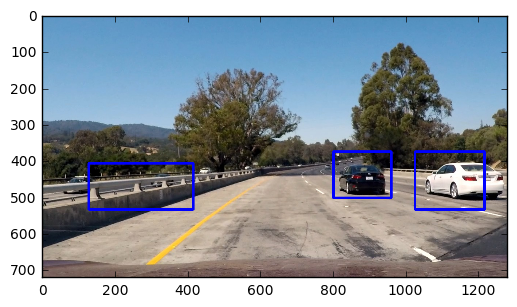

In [3]:
image = mpimg.imread("input_images/test1.jpg")
t=time.time()
result = road.process_image(image)
print("Took {} seconds to find images.".format(round(time.time()-t, 1)))
plt.imshow(result)
plt.show()

In [4]:
from detection.data import load_data

vehicle_imgs, non_vehicle_imgs = load_data("small")

/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicle.zip already downloaded.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/vehicles_smallset already unzipped.
/Users/kyledorman/Documents/carnd/vehicleDetection/data/small/non-vehicles_smallset already unzipped.
Found 1196 vehicle images and 1125 non-vehicle images in data folder.


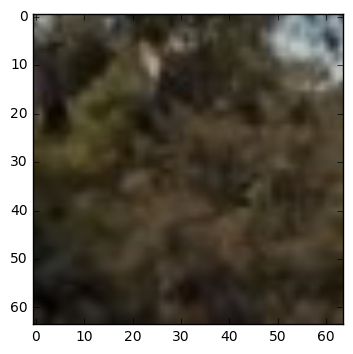

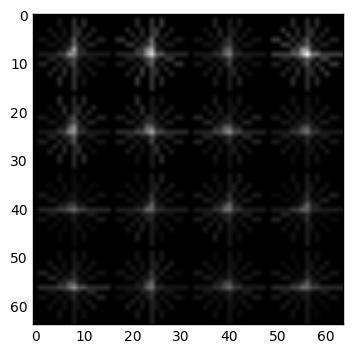

In [5]:
from detection.extract_features import extract_feature
from detection.shared_functions import get_hog_features, convert_color
from detection.config import DetectionConfig

img = non_vehicle_imgs[101]

config = DetectionConfig()
hsv_img = convert_color(img, conv='RGB2HSV')
hog0, hog_img = get_hog_features(hsv_img[:,:,2], config.orient, config.pix_per_cell, config.cell_per_block, vis=True, transform_sqrt=config.transform_sqrt)

plt.imshow(img)
plt.show()
plt.imshow(hog_img, cmap='gray')
plt.show()